In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import display
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imagePath = "/content/drive/MyDrive/Nhom14_TTNT/Data/"
#Đọc ảnh và nhãn
images = []
labels = []
classPaths = os.listdir(imagePath)

# Duyệt các folder
for classFolder in classPaths:
    classImagePath = os.path.join(imagePath, classFolder)
    label = classFolder[-1]
    # Duyệt tất cả ảnh trong mỗi folder
    for imageName in os.listdir(classImagePath):
        image = cv2.imread(os.path.join(classImagePath, imageName))
        image = cv2.resize(image, (32, 32))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image / 255.0
        images.append(image)
        labels.append(label)

imageCount = len(images)
images = np.array(images)
labels = np.array(labels)
images = images.reshape(-1, 32, 32, 1)
print(images)
print(labels)
print(f"Number of images: {imageCount}")
print(images.dtype)
print(images.shape)


[[[[0.        ]
   [0.00784314]
   [0.00392157]
   ...
   [0.        ]
   [0.        ]
   [0.00392157]]

  [[0.00392157]
   [0.        ]
   [0.00392157]
   ...
   [0.00392157]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.00392157]
   [0.00392157]
   [0.        ]]

  ...

  [[0.00784314]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.00392157]
   [0.00392157]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.01568627]
   [0.00392157]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.00392157]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.00784314]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.00784314]
   [0.00392157]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

In [ ]:
# convert labels from string to integer for model input

def stringToInt(char):
    charToInt = {
        "A": 10, "B": 11, "C": 12, "D": 13, "E": 14, "F": 15, "G": 16, "H": 17,
        "I": 18, "J": 19, "K": 20, "L": 21, "M": 22, "N": 23, "O": 24, "P": 25,
        "Q": 26, "R": 27, "S": 28, "T": 29, "U": 30, "V": 31, "W": 32, "X": 33,
        "Y": 34, "Z": 35
    }
    return charToInt[char]

def convertLabels(labelList):
    convertedLabels = []
    for label in labelList:
        if label.isalpha():
            convertedLabels.append(stringToInt(label))
        else:
            convertedLabels.append(int(label))
    return convertedLabels

newLabels = convertLabels(labels)
newLabels = np.array(newLabels, dtype=int)

print(newLabels)


[ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 14 14 14 14 14

In [ ]:
# convert integer to character
def intToString(num):
    intToChar = {
        10: "A", 11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H",
        18: "I", 19: "J", 20: "K", 21: "L", 22: "M", 23: "N",
        24: "O", 25: "P", 26: "Q", 27: "R", 28: "S",
        29: "T", 30: "U", 31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z"
    }
    return intToChar[num]

In [ ]:
# Split data into training and testing sets
imageTrain, imageTest, labelTrain, labelTest = train_test_split(images, newLabels, test_size=0.2, random_state=42)

trainLabelSet = set(labelTrain)
testLabelSet = set(labelTest)
missingLabels = testLabelSet - trainLabelSet

print("Labels in test set but not in training set:", missingLabels)


Labels in test set but not in training set: set()


In [ ]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(imageCount, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(imageTrain, labelTrain, epochs=60, batch_size=42, validation_data=(imageTest, labelTest))


Epoch 1/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.0362 - loss: 6.1275 - val_accuracy: 0.0876 - val_loss: 3.4975
Epoch 2/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.0798 - loss: 3.9909 - val_accuracy: 0.3577 - val_loss: 2.7587
Epoch 3/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2147 - loss: 2.8521 - val_accuracy: 0.5036 - val_loss: 1.8521
Epoch 4/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4124 - loss: 1.9796 - val_accuracy: 0.8467 - val_loss: 0.9708
Epoch 5/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5776 - loss: 1.3904 - val_accuracy: 0.8759 - val_loss: 0.6251
Epoch 6/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7612 - loss: 0.8260 - val_accuracy: 0.9124 - val_loss: 0.3441
Epoch 7/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7612 - loss: 0.7148 - val_accuracy: 0.9343 - val_loss: 0.2935
Epoch 8/60
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8278 - loss: 0.5362 - val_accuracy: 0.9416 - 

In [ ]:
loss, accuracy = model.evaluate(imageTest, labelTest)
print(f'Test Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9653 - loss: 0.0548
Test Accuracy: 0.96


In [ ]:
# Extract features
features = []
for img in images:
    img = cv2.resize(img, (32, 32))
    img = img.astype(np.float32)
    img = img / 255.0
    imgArray = np.expand_dims(img, axis=0)
    imgArray = np.expand_dims(imgArray, axis=-1)
    features.append(model.predict(imgArray))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
print(features)
features = np.array(features)
print(features.dtype)
print(features.shape)

[array([[0.00338529, 0.00905509, 0.01913956, 0.00616303, 0.00949831,
        0.00809559, 0.00285765, 0.01536462, 0.00407719, 0.0048006 ,
        0.01197475, 0.00109123, 0.00482585, 0.00708148, 0.00432568,
        0.00471671, 0.00254709, 0.00085994, 0.00649058, 0.0230095 ,
        0.01158276, 0.00872156, 0.00692304, 0.00644357, 0.00752986,
        0.00493706, 0.00068799, 0.00505659, 0.00584968, 0.0065331 ,
        0.00072077, 0.00124294, 0.00125826, 0.00115815, 0.00099334,
        0.00102331, 0.00050672, 0.00135522, 0.00077475, 0.00140649,
        0.00075705, 0.00107739, 0.00119453, 0.00107848, 0.00086806,
        0.00111016, 0.00103504, 0.00089011, 0.00087337, 0.00100937,
        0.00097   , 0.0016241 , 0.00081453, 0.00154154, 0.00106285,
        0.00132973, 0.00154979, 0.00098863, 0.00093144, 0.00092989,
        0.00080422, 0.00049507, 0.0013264 , 0.00129982, 0.00104682,
        0.00187372, 0.00081582, 0.00100665, 0.00102253, 0.0011548 ,
        0.00126313, 0.00101084, 0.00113992, 0.0

In [ ]:
features = features.reshape(len(features), -1)
print(features.shape)
print(features)

(684, 684)
[[0.00338529 0.00905509 0.01913956 ... 0.00070318 0.00108629 0.00086142]
 [0.00340807 0.00906461 0.01911628 ... 0.00070468 0.00108336 0.00086217]
 [0.00338821 0.00914001 0.01929923 ... 0.00070179 0.0010782  0.00085868]
 ...
 [0.00338866 0.00899794 0.01892707 ... 0.00069631 0.00108106 0.00087003]
 [0.00338222 0.00900222 0.01892107 ... 0.0006968  0.00108162 0.00087011]
 [0.00338746 0.00901379 0.01892186 ... 0.0006967  0.00108196 0.00087033]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Chia dữ liệu train/test cho mô hình KNN
featuresTrain, featuresTest, labelsKnnTrain, labelsKnnTest = train_test_split(features, newLabels, test_size=0.2, random_state=42)

# Huấn luyện mô hình KNN dùng vector đặc trưng từ CNN
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(featuresTrain, labelsKnnTrain)

# Dự đoán và tính độ chính xác
yPred = knnModel.predict(featuresTest)
accuracy = accuracy_score(labelsKnnTest, yPred)
print(f"KNN model accuracy: {accuracy * 100:.2f}%")


KNN model accuracy: 95.62%


In [ ]:

def processImage(img):
    img = img / 255.0
    img = np.array(img)
    imgArray = np.expand_dims(img, axis=0)
    imgArray = np.expand_dims(imgArray, axis=-1)
    feature = model.predict(imgArray)
    feature = np.array(feature)
    feature = feature.reshape(1, -1)
    prediction = knnModel.predict(feature)
    return prediction[0]

Skew angle: 8.999992


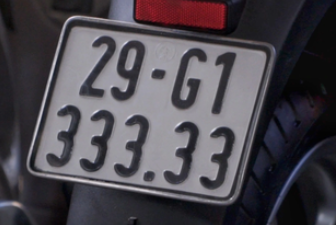

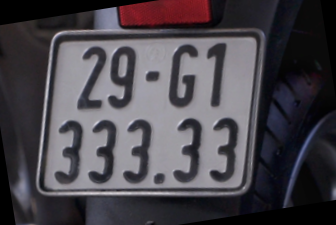

In [ ]:
def processSkew(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, gray = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
    angle = 0
    if lines is not None:
        for rho, theta in lines[:, 0]:
            angle = np.degrees(theta) - 90
            break

    print("Skew angle: " + str(angle))

    # Rotate ảnh
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated

skewedImage = cv2.imread("/content/drive/MyDrive/Nhom14_TTNT/anhNghieng.jpg")

rotatedImage = processSkew(skewedImage)
cv2_imshow(skewedImage)
cv2_imshow(rotatedImage)




Saving main.jpg to main (7).jpg
Uploaded image: main (7).jpg
Skew angle: 0


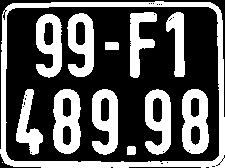

Coordinates: 36 14 26 64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Coordinates: 67 13 27 64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Coordinates: 130 12 27 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Coordinates: 166 12 19 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Coordinates: 16 89 27 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Coordinates: 53 89 28 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Coordinates: 92 89 26 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Coordinates: 145 89 26 66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Coordinates: 182 89 27 65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Recognized license plate characters:
['9', '9', 'F', '1', '4', '8', '9', '9', '8']


In [ ]:
recognizedChars = []

def extractCharsAndProcess(path):
    image = cv2.imread(path)
    image = processSkew(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        # Check if contour has 4 points (quadrilateral)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(contour)
            aspectRatio = w / float(h)
            # Condition to identify license plate area
            if 1 < aspectRatio < 2 and w > 200 and h > 20:
                plateImage = image[y:y+h, x:x+w]
                plateGray = cv2.cvtColor(plateImage, cv2.COLOR_BGR2GRAY)
                # Convert to binary image for better character distinction
                _, plateThresh = cv2.threshold(plateGray, 127, 255, cv2.THRESH_BINARY_INV)
                cv2_imshow(plateThresh)

                # Find contours of characters inside license plate
                contours, _ = cv2.findContours(plateThresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
                # Sort contours by y then x to maintain reading order
                contours = sortContours(contours)

                for i, charContour in enumerate(contours):
                    x, y, w, h = cv2.boundingRect(charContour)
                    aspectChar = h / float(w)
                    # Conditions to filter valid character contours
                    if 2 < aspectChar < 5 and w > 5 and h > 30:
                        charImage = plateImage[y:y+h, x:x+w]
                        charImage = cv2.resize(charImage, (32, 32))
                        charImage = cv2.cvtColor(charImage, cv2.COLOR_BGR2GRAY)
                        _, charImage = cv2.threshold(charImage, 127, 255, cv2.THRESH_BINARY_INV)
                        print("Coordinates:", x, y, w, h)
                        recognizedChars.append(processImage(charImage))
                break


def sortContours(contourList):
    contourList = sorted(contourList, key=lambda cnt: cv2.boundingRect(cnt)[1])
    sortedList = []
    currentY = -1
    currentLineContours = []

    for contour in contourList:
        x, y, w, h = cv2.boundingRect(contour)
        if abs(y - currentY) > h:
            currentLineContours = sorted(currentLineContours, key=lambda cnt: cv2.boundingRect(cnt)[0])
            sortedList.extend(currentLineContours)
            currentLineContours = [contour]
            currentY = y
        else:
            currentLineContours.append(contour)
            currentY = y

    currentLineContours = sorted(currentLineContours, key=lambda cnt: cv2.boundingRect(cnt)[0])
    sortedList.extend(currentLineContours)

    return sortedList

def uploadAndRecognizeImage():
    uploaded = files.upload()
    if not uploaded:
        print("No file uploaded. Exiting.")
        return

    imagePath = list(uploaded.keys())[0]
    print(f"Uploaded image: {imagePath}")
    extractCharsAndProcess(imagePath)
    for i in range(len(recognizedChars)):
      if recognizedChars[i] > 9:
        recognizedChars[i] = intToString(recognizedChars[i])
      else:
        recognizedChars[i] = str(recognizedChars[i])

    print("Recognized license plate characters:")
    print(recognizedChars)

uploadAndRecognizeImage()
